<a href="https://colab.research.google.com/github/fikhan/FreeCodeCampMachineLearningCoLabCodeBook/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf

In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2245292947372181449
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14410383360
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3723755664894884058
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [2]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


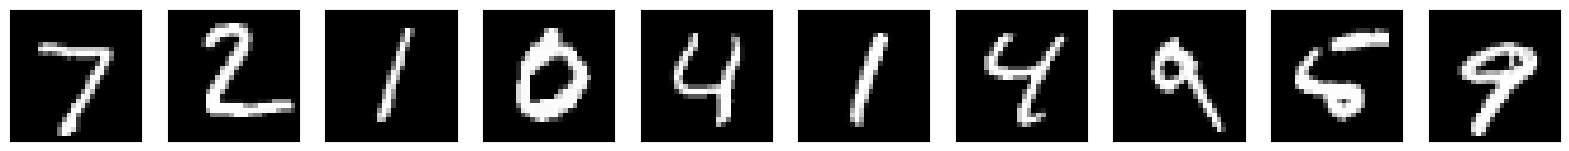

In [12]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()
plt.close()


In [13]:
print("x_train Shape:", x_train.shape)
print("y_train Shape:", y_train.shape)
print("x_test Shape:", x_test.shape)
print("y_test Shape:",y_test.shape)

x_train Shape: (60000, 28, 28)
y_train Shape: (60000,)
x_test Shape: (10000, 28, 28)
y_test Shape: (10000,)


In [17]:
print("x_train test",x_train.shape[0])

x_train test 28


In [14]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [15]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [19]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,num_classes = 10)
y_test = to_categorical(y_test,num_classes = 10)

print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10, 10)


In [23]:
pip install tensorflow

In [3]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense ,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [4]:
# img_rows, img_cols, channels = 28, 28, 1 # 1 for greyscale images and 3 for rgb images

# classes=10
# Define the dimensions of the input image
img_rows, img_cols, channels = 28,28,1
# Define the number of filters for each layer of the CNN
filters = [6,32,80,120]
# Define the number of classes for classification
classes = 10